In [18]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import random

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
plt.rcParams["figure.figsize"] = (12,9)

In [21]:
def runge_kutta(function, parameters, iterations, initial, step):
    x_val = [initial[0]]
    y_val = [initial[1]]
    z_val = [initial[2]]
    t_val = [0]
    for i in range(round(iterations/step)):
        x1, y1, z1 = function(x_val[-1], y_val[-1], z_val[-1], parameters)
        x2, y2, z2 = function(x_val[-1]+step*x1/2, y_val[-1]+step*y1/2, z_val[-1]+step*z1/2, parameters)
        x3, y3, z3 = function(x_val[-1]+step*x2/2, y_val[-1]+step*y2/2, z_val[-1]+step*z2/2, parameters)
        x4, y4, z4 = function(x_val[-1]+step*x3, y_val[-1]+step*y3, z_val[-1]+step*z3, parameters)
        
        x_val.append(x_val[-1]+step*(x1+2*x2+2*x3+x4)/6)
        y_val.append(y_val[-1]+step*(y1+2*y2+2*y3+y4)/6)
        z_val.append(z_val[-1]+step*(z1+2*z2+2*z3+z4)/6)
        t_val.append(t_val[-1]+step)
    return t_val, x_val, y_val, z_val

In [22]:
def lorenz(x, y, z, parameters):
    a, r, b = parameters
    return (-a*x + a*y, r*x - y - x*z, x*y - b*z) 

In [23]:
parameters = (10, 28, 8/3)
initial = (1, 1, 1)
iterations = 100
step = 0.01

In [24]:
t, x, y, z = runge_kutta(lorenz, parameters, iterations, initial, step)

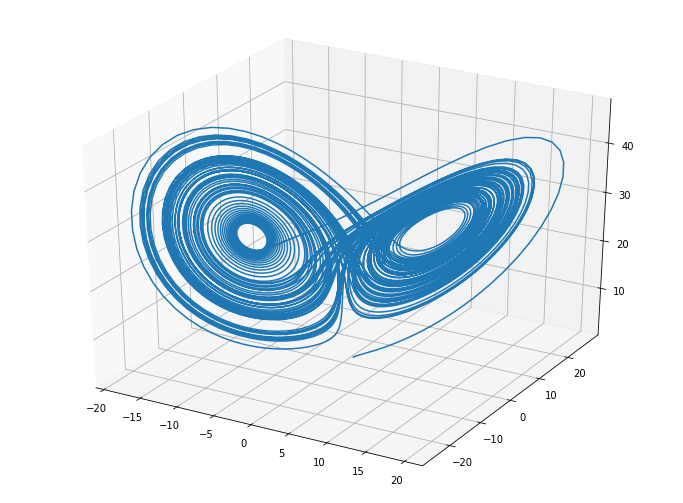

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)

In [43]:
colormap = plt.get_cmap('cool')
norm = mpl.colors.Normalize(0.0, 2*np.pi)

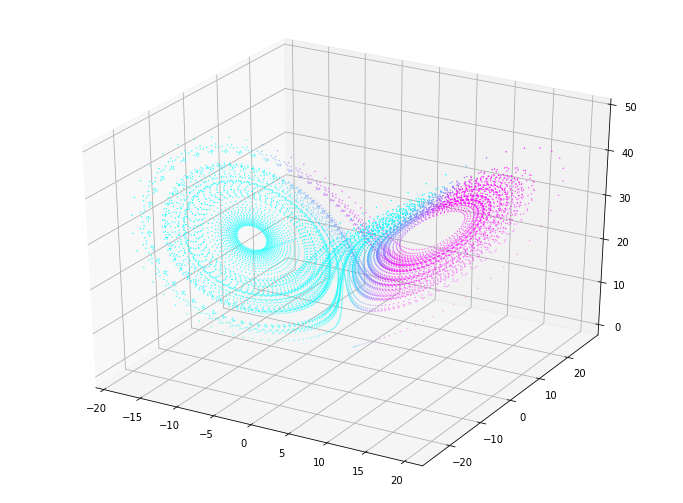

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=y, s=2, cmap=colormap, norm=norm, linewidths=0)